Intensity Transformations and Histogram Processing

1. Point/Intensity transformation: Negative of an image.
First print the maximum intensity value of input image and then subtract the intensity values
from max value

In [1]:
from PIL import Image
import numpy as np
import matplotlib.pylab as plt

In [2]:
im = Image.open("/content/parrot.jpg")

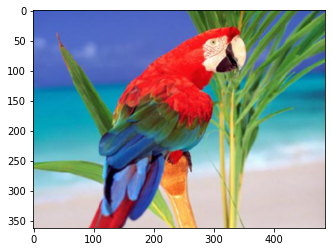

In [5]:
plt.imshow(im)

In [6]:
max=0
im.size

(486, 362)

In [7]:
largest = np.amax(im)
print(largest)

255


Negative

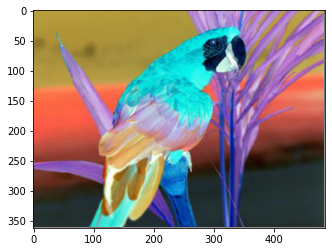

In [8]:
for i in range(0, im.size[0] - 1): 
    for j in range(0, im.size[1] - 1): 
        pixel = im.getpixel((i,j))
        pixel1 = 255 - pixel[0] 
        pixel2 = 255 - pixel[1] 
        pixel3 = 255 - pixel[2] 
        im.putpixel( (i,j),(pixel1,pixel2,pixel3) )

plt.imshow(im) 
plt.show() 

2. Point/Intensity transformation: Log transformation

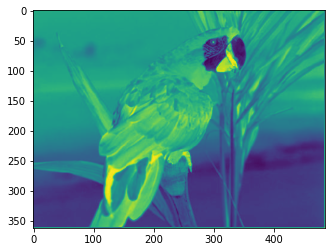

In [9]:
from PIL import Image
import numpy as np
import matplotlib.pylab as plt
im_g = im.convert('L')
plt.imshow(im_g)

In [10]:
im_g=np.array(im_g)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


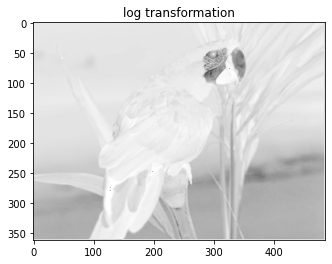

In [11]:
c = 255/(np.log(1 + np.max(im_g))) 
log_transformed = c * np.log(1 + im_g) 
  
log_transformed = np.array(log_transformed, dtype = np.uint8) 
  
plt.title("log transformation")
plt.imshow(log_transformed, cmap=plt.cm.gray)

3. Histogram Processing
a) To plot the histogram of R,G,B channels of an image. First split your RGB input
image into three channels and then plot the histograms of these three R,G,B
channels in same graph. In graph, x-axis: Pixel value, y-axis: Frequency of those
pixels 


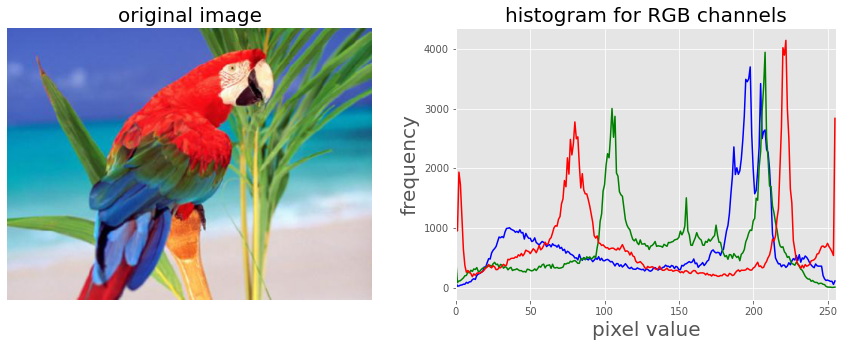

In [29]:
from PIL import Image
import numpy as np
import matplotlib.pylab as plt
im = Image.open("/content/parrot.jpg") # RGB input image
im_r, im_g, im_b = im.split() # To split the RGB image into 3 channels
plt.style.use('ggplot')
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.imshow(im, cmap='gray')
plt.title('original image', size=20)
plt.axis('off')
plt.subplot(122)
# Use the function here to plot histogram of im_r
# Use the function here to plot histogram of im_g
# Use the function here to plot histogram of im_b
img = cv2.imread("/content/parrot.jpg")
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.xlabel('pixel value', size=20)
plt.ylabel('frequency', size=20)
plt.title('histogram for RGB channels', size=20)
plt.show()

In [14]:
from PIL import Image
import numpy as np
import matplotlib.pylab as plt
im = Image.open("/content/parrot.jpg") # RGB input image
im_r, im_g, im_b = im.split() # To split the RGB image into 3 channels

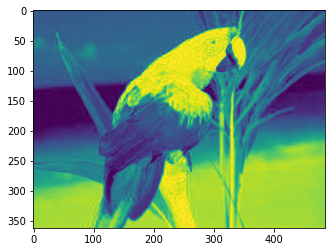

In [15]:
plt.imshow(im_r)

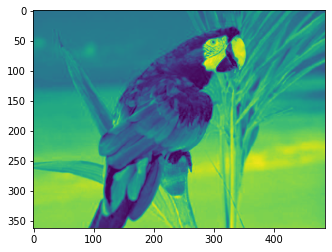

In [16]:
plt.imshow(im_g)

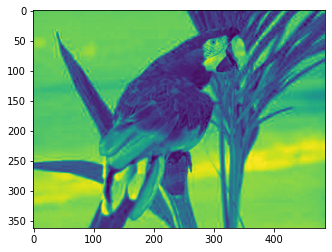

In [17]:
plt.imshow(im_b)

b) Histogram Equalization
For input image, show 4 subplots: original image, its histogram, new image after
equalization and its histogram plot.

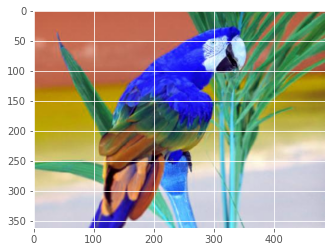

In [21]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from skimage.exposure import equalize_hist
img = cv2.imread("/content/parrot.jpg")
plt.imshow(img)

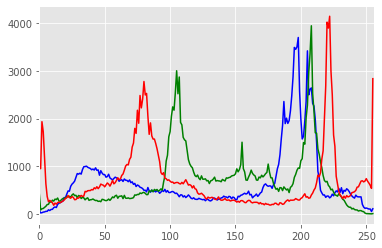

In [22]:
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

/usr/local/lib/python3.6/dist-packages/skimage/exposure/exposure.py:181: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  hist, bin_centers = histogram(image, nbins)


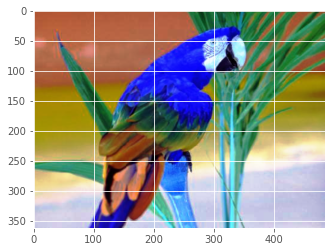

In [23]:
eq = np.float32(equalize_hist(img))
plt.imshow(eq)

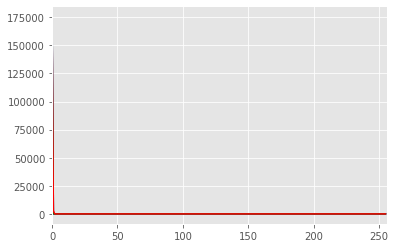

In [24]:
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([eq],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

4. Contrast Stretching:
Write a program for contrast stretching of an RGB image and then draw the
histograms of R,G,B channels of output image. The following section describes how to
implement contrast-stretching using the PIL library. 

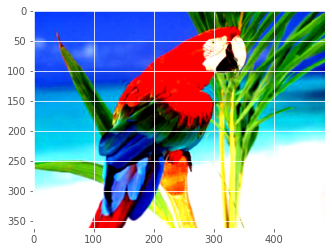

In [31]:
from PIL import Image, ImageEnhance
img = Image.open("/content/parrot.jpg")
new=ImageEnhance.Contrast(img)
res=new.enhance(2)
plt.imshow(res)


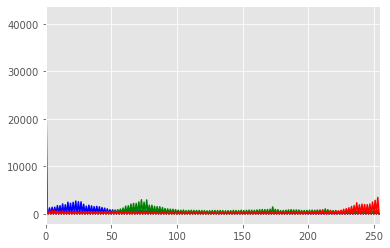

In [26]:
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([np.float32(res)],[i],None,[255],[0,255])
    plt.plot(histr,color = col)
    plt.xlim([0,255])
plt.show()